<a href="https://colab.research.google.com/github/ambika1us/Cardiovascular_Risk_Prediction/blob/main/Ambika_Prasad_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3><b>Project Name</b> - Cardiovascular Risk Prediction</h3>

<h5><b>Project Type : </b>Classification<br></h5>
<h5><b>Contribution : </b>Indivisual</h5>
<h5><b>Contributor : </b>Ambika Prasad Rath (ambika1us@gmail.com)</h5>

<h4><b>Project Summary - </b></h4>

<p>The main objective of this project is the prediction heart disease using different classification algorithms such as logistic regression, K-Nearest Neighbors, Support Vector Machine, Naive Bayesian algorithm, Decision Tree and Random forest classifier algorithms. The evaluation metrics used is confusion matrix and K-fold cross validation score.</p>
<h5>Methodology:</h5>
<ul>
<li>Import necessory libraries.</li>
<li>Import dataset, Read the dataset, the data should contain different variables like age, sex,cp,slop target.</li>
<li>Data Visualization using histogram distribution line and bar graph. Use of heatmap for determining the correlation of the various features with each other.</li>
<li>Data pre-processing: dummy variable trap for elimination of insignificant features from the dataset, spletting of the dataset into training and test sets feature scaling.</li>
<li>The machine learning models used for the risk prediction and classification of heart diseases are as follows:
<ol>
<li>Logistic Regression</li>
<li>Ensembles decision tree</li>
<li>K-Nearest Neighbors</li>
<li>Gradient Booster Classifier</li>
<li>Decision Trees Classifier</li>
<li>XGBoost Classifier</li>
</ol></li>
<li>Evaluation of the performance and accuracy of the various ML models employed. Evaluation metrics consisted of:
<ol>
<li>confusion matrix</li>
<li>K-fold cross validation score</li> 
</ol>
</li>
<li>Plotting a bar graph for the comparison of the various test accuracies obtained by using the various ML classification algorithms.</li>
</ul>

<h5><b>Github Link:</b> https://github.com/ambika1us/Cardiovascular_Risk_Prediction</h5>

<h4><b>Problem Statement:</b></h4>
<p>The dataset is from an ongoing cardiovascular study on residents of the town of framingham, massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease. The dataset provides the patients information. It includes over 4000 records and 15 attributes variables. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.</p>

<h4><b>Data Description:</b></h4>
<h5>Demographic:</h5>
<ul>
<li>Sex: Male or Female ("M" or "F")</li>
<li>Age: Age of the patient (continuous - although the recorded ages have been truncated to whole numbers, the concept of age is continuous)</li>
</ul>

<h5>Behavioral:</h5>
<ul>
<li>is_smoking: whether or not the patient is a current smoker ("YES" or "NO")</li>
<li>Cigs per Day: the number of cigarettes that the person smoked on average in one day (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)</li>
</ul>
<h5>Medical (History):</h5>
<ul>
<li>BP Meds: whether or not the patient was on blood pressure medication (Nominal)</li>
<li>Prevalent stroke: whether or not the patient was hypertensive (Nominal)</li>
<li>Diabetes: whether or not the patient had diabetes (Nominal) medical (Current)</li>
<li>Tot Chol: Total cholesterol level (Continuous)</li>
<li>Sys BP: Systolic blood pressure (Continuous)</li>
<li>Dia BP: Diastolic blood pressure (Continuous)</li>
<li>BMI: Body mass index (Continuous)</li>
<li>Heart Rate: heart rate (Continuous - In medical research, variable such as heart rate through in fact discrete, yet are considered continuous because of large number of possible values)</li>
<li>Glucose: glucose level (Continuous) predict variable (desired target)</li>
<li>10-year risk of coronary heart disease CHD (binary: "1" means "Yes", "0" means "NO") DV</li>
</ul>

In [1]:
#Importing Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve,plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
crp_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project_Classification/data_cardiovascular_risk.csv', index_col="id")

<h4><b>Data Preparation:</b></h4>

In [4]:
crp_df.head(1)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1


In [5]:
crp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [6]:
#Looking up for the detailed description of our dataset
crp_df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


Checking min and max, all data points are in valid range.<br>
Now let's go ahead and check for the missing values in rest of the dataset.

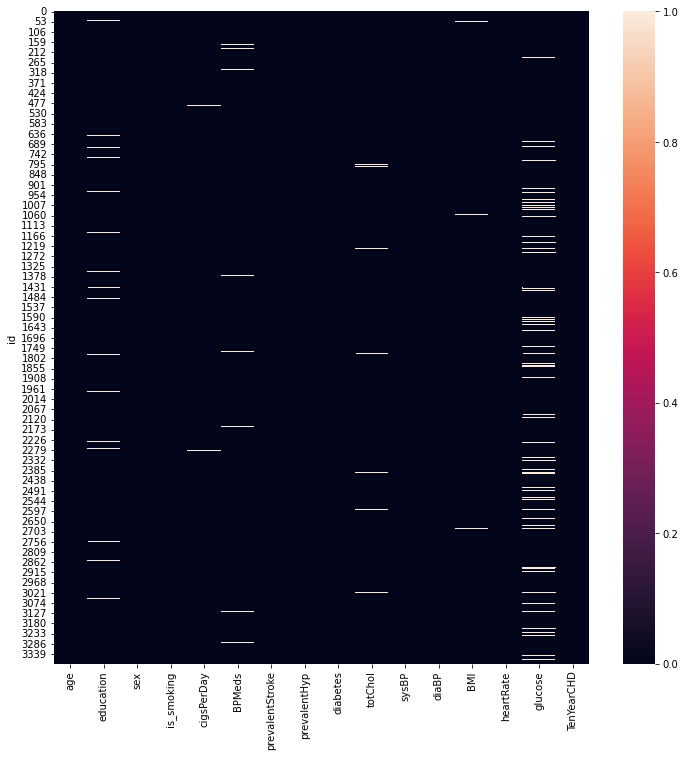

In [7]:
mis_val=crp_df.isnull()
plt.figure(figsize=(12,12))
sns.heatmap(mis_val)

In [8]:
#summing up the missing values
missing=crp_df.columns[crp_df.isnull().any()].tolist()
print('Missing Data Count')
print(crp_df[missing].isnull().sum().sort_values(ascending=False))
print('Missing Data Percentage')
print(round(crp_df[missing].isnull().sum().sort_values(ascending=False)/len(crp_df)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [9]:
#crp_df.dropna(inplace=True)
#Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  crp_df[col]=crp_df[col].fillna(crp_df[col].median())

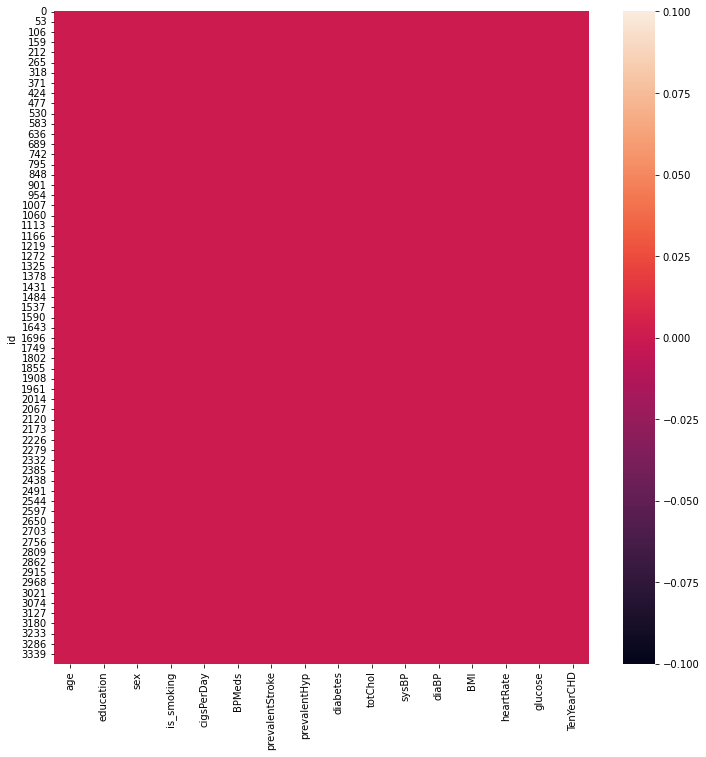

In [10]:
#Plotting the heatmap for missing values
mis_val=crp_df.isnull()
plt.figure(figsize=(12,12))
sns.heatmap(mis_val)

After treating the missing values, let's check the outliers

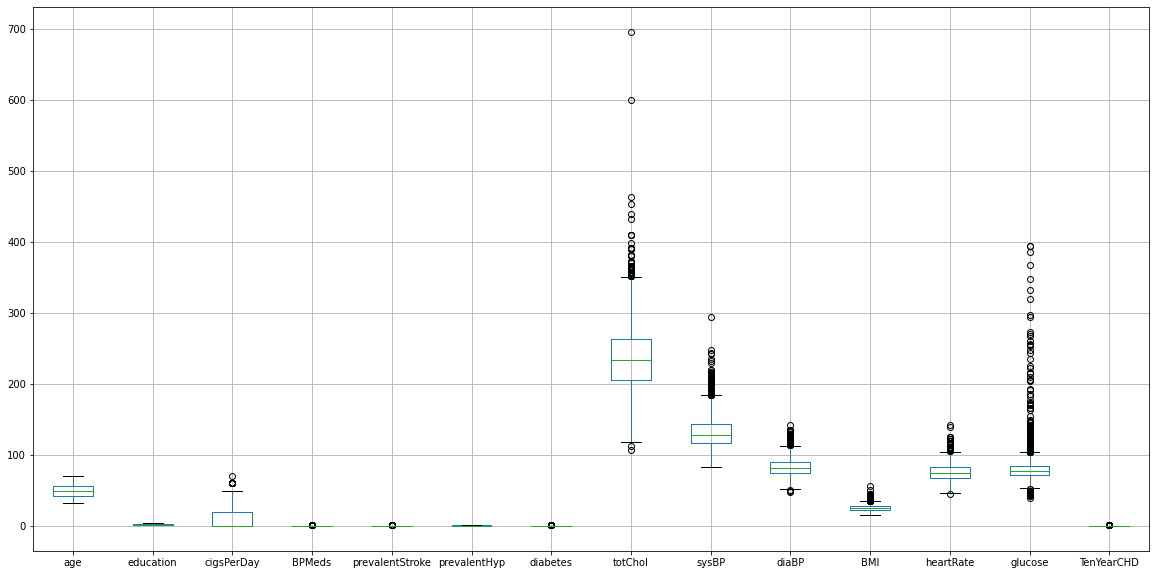

In [11]:
plt.figure(figsize=(20,10))
crp_df.boxplot()

There are outliers but within the possible range of values<br>
Let's check the correlation between each feature

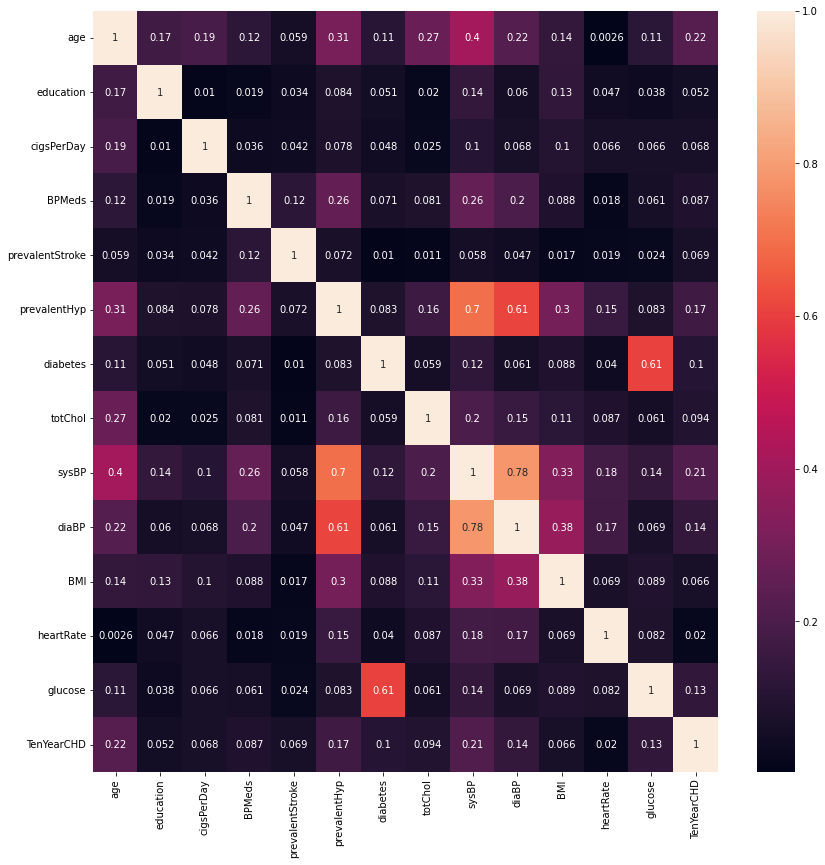

In [12]:
#Let's plot the correlation matrix using heatmap
plt.figure(figsize=(14,14))
correlation=crp_df.corr()
sns.heatmap(abs(correlation),annot=True)

There is no significant correlation between independent & dependent variable but there is a high correlation within independent variable.

<h4><b>Analysing the categorical features:</b></h4>
<h6><b>Which gender is prone to coronary heart disease?</b></h6>

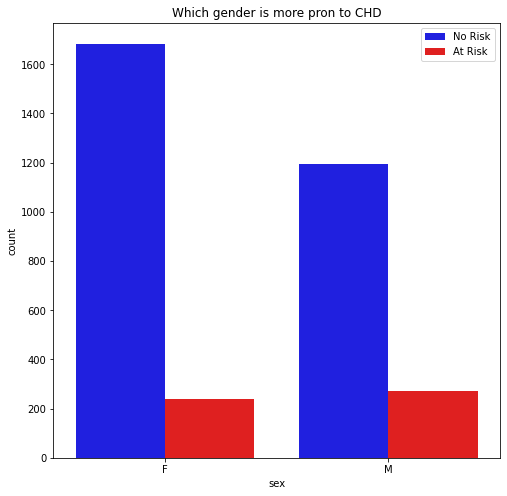

In [13]:
#10-year risk of coronary heart disease (binary: "1" means "Yes", "0" means "No")
pale={0:'blue',1:'red'}
plt.figure(figsize=(8,8))
sns.countplot(x=crp_df['sex'],hue=crp_df['TenYearCHD'],palette=pale)
plt.title("Which gender is more pron to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

<h6><b>Are diabetic patients at more risk of coronary heart disease?</b></h6>

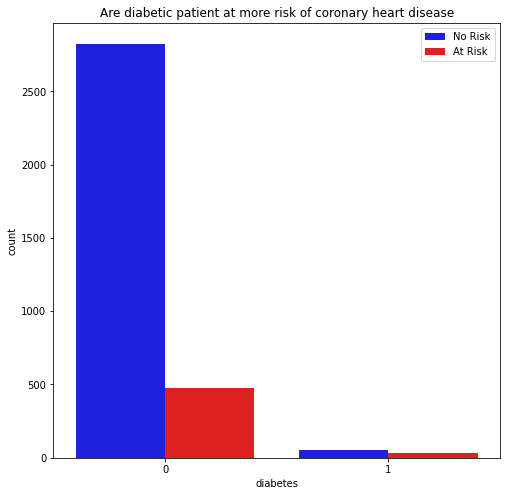

In [14]:
pale={0:'blue',1:'red'}
plt.figure(figsize=(8,8))
sns.countplot(x=crp_df['diabetes'],hue=crp_df['TenYearCHD'],palette=pale)
plt.title("Are diabetic patient at more risk of coronary heart disease")
plt.legend(['No Risk','At Risk'])
plt.show()

<h6><b>Are smokers at more risk of coronary heart desease?</b></h6>

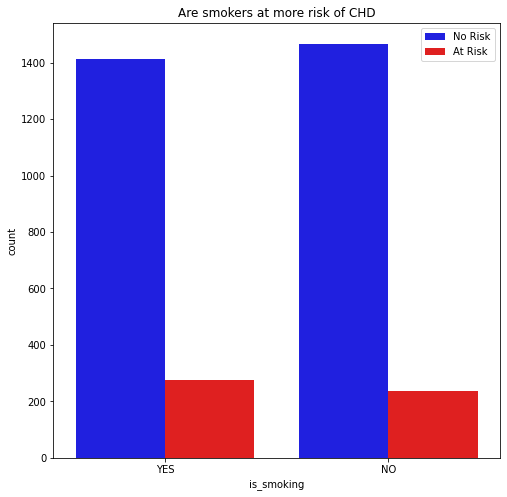

In [15]:
pale={0:'blue',1:'red'}
plt.figure(figsize=(8,8))
sns.countplot(x=crp_df['is_smoking'],hue=crp_df['TenYearCHD'],palette=pale)
plt.title('Are smokers at more risk of CHD')
plt.legend(['No Risk','At Risk'])
plt.show()

<h6><b>Are hypertensive patients at more risk of CHD?</b></h6>

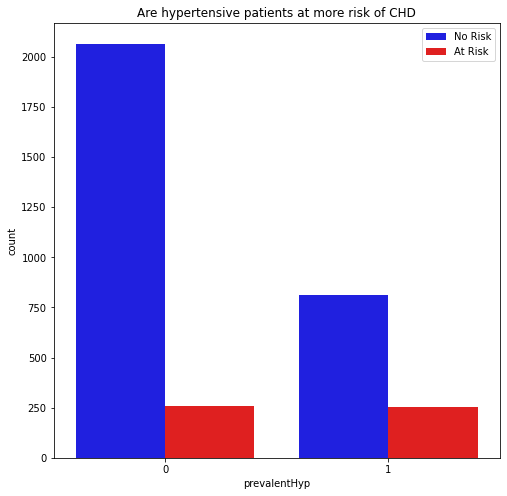

In [16]:
pale={0:'blue',1:'red'}
plt.figure(figsize=(8,8))
sns.countplot(x=crp_df['prevalentHyp'],hue=crp_df['TenYearCHD'],palette=pale)
plt.title('Are hypertensive patients at more risk of CHD')
plt.legend(['No Risk','At Risk'])
plt.show()

<h6><b>Are patients with blood pressure on medication at more risk of coronary heart disease?</b></h6>

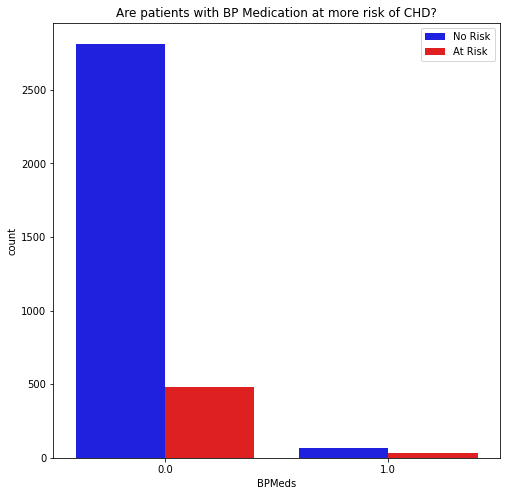

In [17]:
pale={0:'blue',1:'red'}
plt.figure(figsize=(8,8))
sns.countplot(x=crp_df['BPMeds'],hue=crp_df['TenYearCHD'],palette=pale)
plt.title('Are patients with BP Medication at more risk of CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

<h6><b>Which age group is more vulnerable to coronary heart disease?</b></h6>

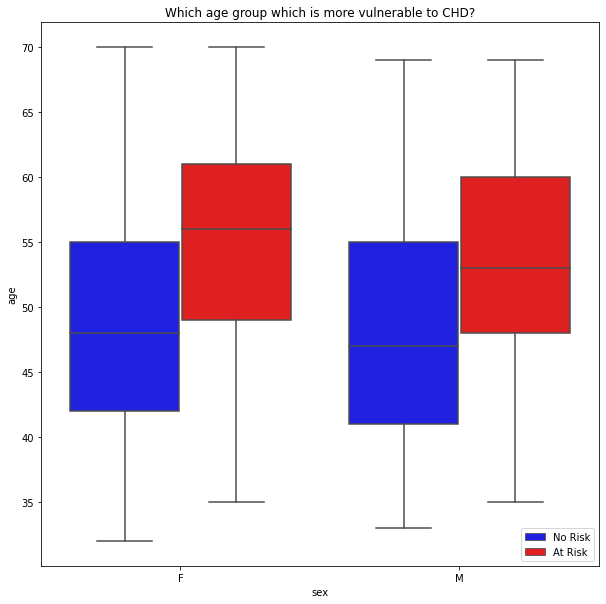

In [18]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(x=crp_df['sex'],y=crp_df['age'],hue=crp_df['TenYearCHD'],palette=pale)
plt.title('Which age group which is more vulnerable to CHD?')
handles,_=ax.get_legend_handles_labels()
ax.legend(handles,['No Risk','At Risk'],loc="best")
plt.show()

<h6><b>Are total cholestrol levels related to coronary heart disease?</b></h6>

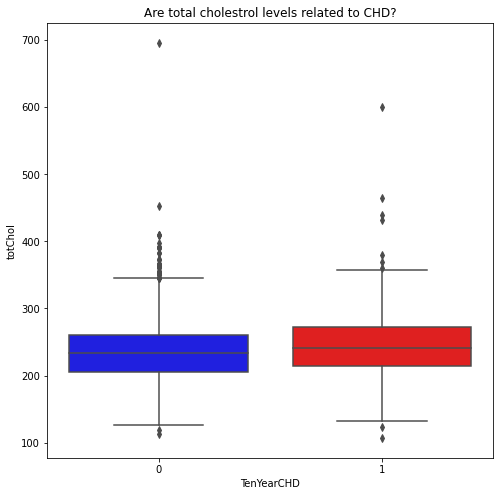

In [19]:
plt.figure(figsize=(8,8))
sns.boxplot(crp_df['TenYearCHD'],crp_df['totChol'],palette=pale)
plt.title('Are total cholestrol levels related to CHD?')
plt.show()

This indicates that cholestrol level is not the sole deciding factor for predicting whether the person gets CHD or not. People with similar levels of cholestrol have get CHD as well as are free from CHD. Clearly, there is no direct correlation of CHD with the cholestral level.

<h6><b>Is heart rate is responsible for CHD?</b></h6>

In [20]:
def heartRate_data(row):
  if row['heartRate']<=59:
    value='Low'
  elif row['heartRate']<100:
    value='Normal'
  else:
    value='High'
  return value

In [21]:
crp_df['heartRateLabel']=crp_df.apply(heartRate_data,axis=1)

In [22]:
crp_df['heartRateLabel'].value_counts

<bound method IndexOpsMixin.value_counts of id
0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
         ...  
3385    Normal
3386    Normal
3387    Normal
3388    Normal
3389    Normal
Name: heartRateLabel, Length: 3390, dtype: object>

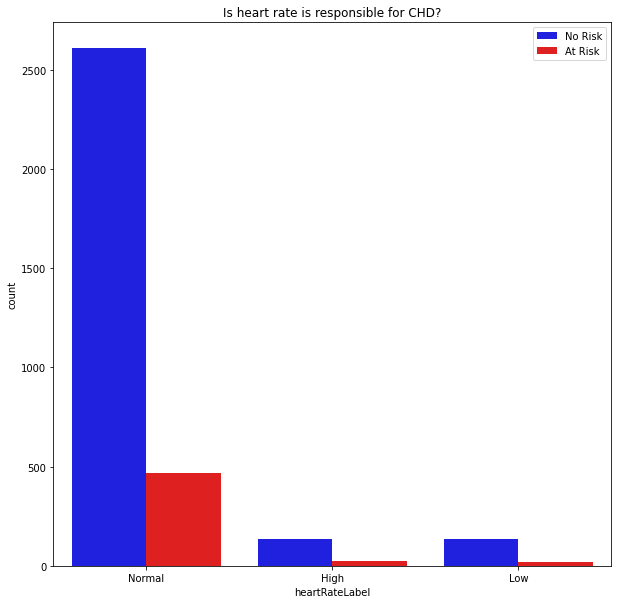

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(x=crp_df['heartRateLabel'],hue=crp_df['TenYearCHD'],palette=pale)
plt.title('Is heart rate is responsible for CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

In [24]:
crp_df.drop(columns=['heartRateLabel'],inplace=True)

<h6><b>How much smoking affect CHD?</b></h6>

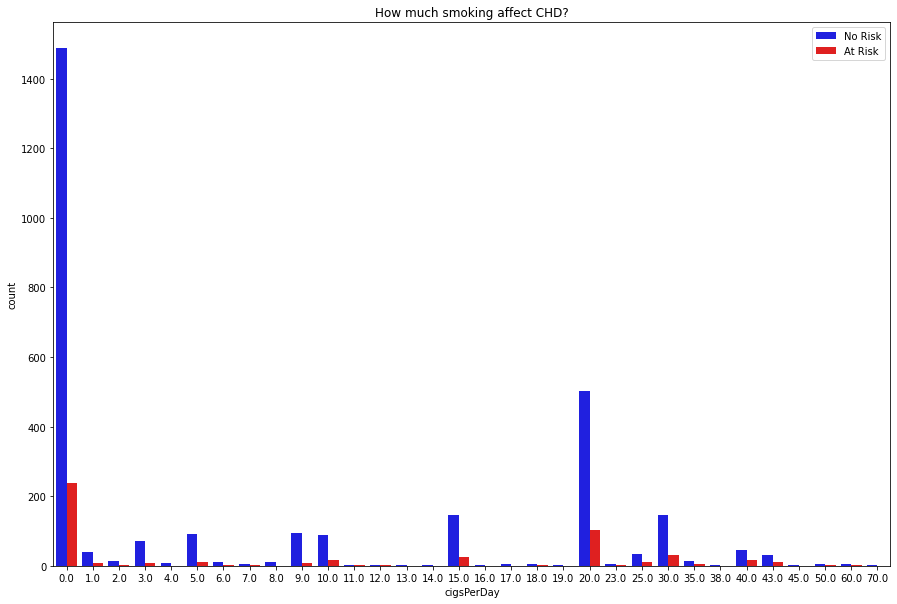

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(x=crp_df['cigsPerDay'],hue=crp_df['TenYearCHD'],palette=pale)
plt.title('How much smoking affect CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

<h6><b>Whether  person who had a stroke earlier more prone to CHD?</b></h6>

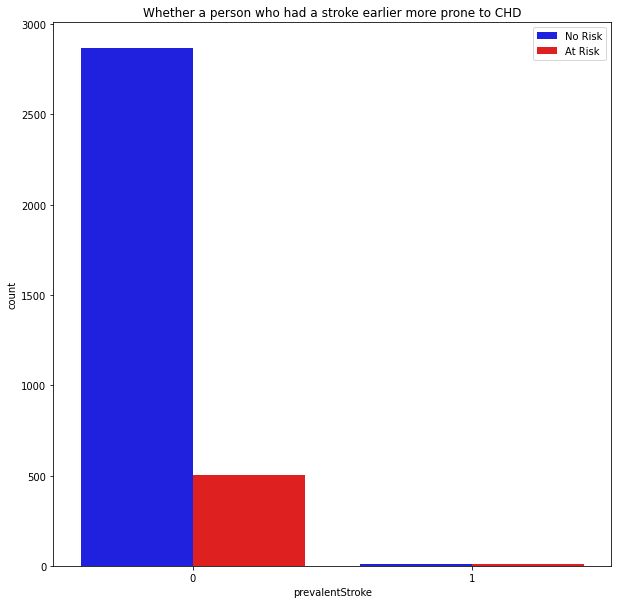

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(x=crp_df['prevalentStroke'],hue=crp_df['TenYearCHD'],palette=pale)
plt.title('Whether a person who had a stroke earlier more prone to CHD')
plt.legend(['No Risk','At Risk'])
plt.show()

<h6><b>Are patients with systolic BP at risk of CHD?</b></h6>

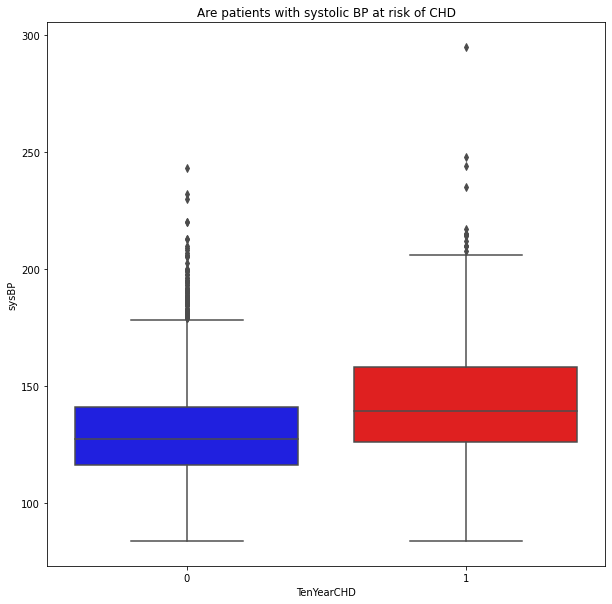

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(crp_df['TenYearCHD'],crp_df['sysBP'],palette=pale)
plt.title('Are patients with systolic BP at risk of CHD')
plt.show()

<h6><b>Are patients with diastolic BP at risk of CHD?</b></h6>

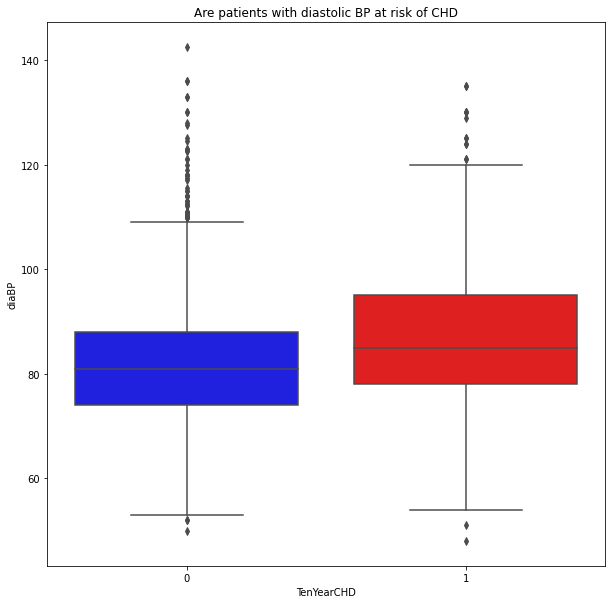

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(crp_df['TenYearCHD'],crp_df['diaBP'],palette=pale)
plt.title('Are patients with diastolic BP at risk of CHD')
plt.show()

<h7><b>Over the years, reserch has found that both numbers are equally important in monitoring heart health. However most studies show a greater risk of stroke and heart disease related to higher systolic pressures compared with elevated disstolic pressures.</b></h7>

<h6><b>Is patients BMI importamt to show the risk of CHD?</b></h6>

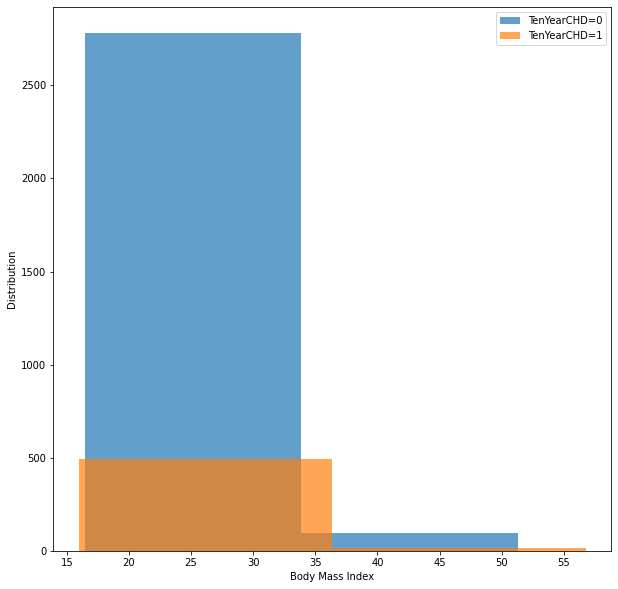

In [29]:
plt.figure(figsize=(10,10))
plt.hist(crp_df['BMI'][crp_df['TenYearCHD']==0],bins=2,alpha=0.7,label='TenYearCHD=0')
plt.hist(crp_df['BMI'][crp_df['TenYearCHD']==1],bins=2,alpha=0.7,label='TenYearCHD=1')
plt.ylabel('Distribution')
plt.xlabel('Body Mass Index')
plt.legend()
plt.show()

<h6><b>Can patients Glucose levels show the risk of CHD?</b></h6>

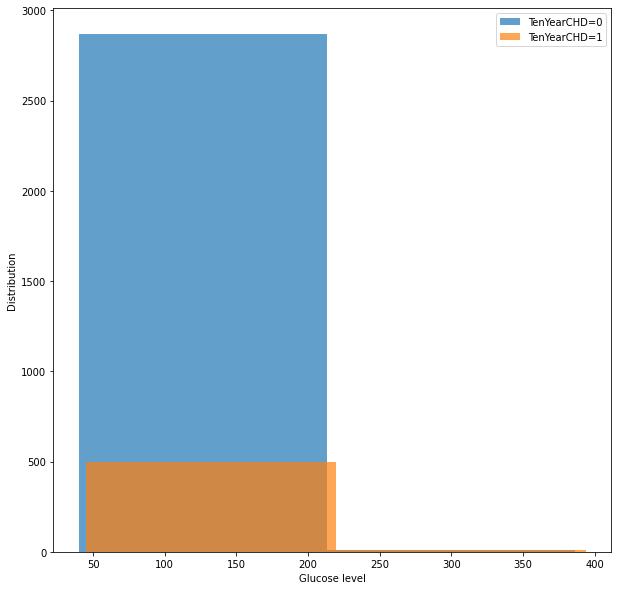

In [30]:
plt.figure(figsize=(10,10))
plt.hist(crp_df['glucose'][crp_df['TenYearCHD']==0],bins=2,alpha=0.7,label='TenYearCHD=0')
plt.hist(crp_df['glucose'][crp_df['TenYearCHD']==1],bins=2,alpha=0.7,label='TenYearCHD=1')
plt.ylabel('Distribution')
plt.xlabel('Glucose level')
plt.legend()

<h3><b>Model Building</b></h3>

<h5><b>Feature engineering</b></h5>

Systolic and diastolic blood pressure has a high correlation that can be commonly classified into hypertension.

In [31]:
def blood_pressure_classification(SysBP,DiaBP):
  if (SysBP<90) or (DiaBP<60):
    return 0 #'Hypotension'
  if (SysBP<120) and (DiaBP<80):
    return 1 #'Optimal'
  if (SysBP<130) or (DiaBP<86):
    return 2 #'Normal'
  if (SysBP<140) or (DiaBP<90):
    return 3 #'PreHypertensive'
  if (SysBP>140) and (DiaBP<90):
    return 4 #'IsolatedSystolicHypertension'
  if (SysBP<160) or (DiaBP<100):
    return 5 #'GradeI'
  if(SysBP<180) or (DiaBP<110):
    return 6 #'GradeII'
  return 7 #'GradeIII'

In [32]:
crp_df['Hypertension']=crp_df.apply(lambda x:blood_pressure_classification(x['sysBP'],x['diaBP']),axis=1)

In [33]:
crp_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension
id,,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,2
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2


Blood glucose level can be used to classify the severity of Diabetes.

In [34]:
def diabetes_grade(glucose):
  if glucose<100:
    return 1 #'Normal'
  if glucose<125:
    return 2 #'Prediabetic'
  if glucose<200:
    return 3 #'Mild'
  if glucose<400:
    return 4 #'Moderate'
  return 5 #'Severe'

In [35]:
crp_df['Diabetes']=crp_df['glucose'].apply(lambda x:diabetes_grade(x))

In [36]:
crp_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension,Diabetes
id,,,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,2,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5,1
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2,1


The absolute number of cigarettes per day is not much useful variable because the stiffness of blood vessels increases as the number of cigarettes consumed per day increases. so new feature containing log transformation value could be more useful.

In [37]:
crp_df['SmokingFactor']=crp_df['cigsPerDay'].apply(lambda x:0 if x<1 else np.log(x))
crp_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension,Diabetes,SmokingFactor
id,,,,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,2,1,1.098612
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5,1,0.000000
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1,2.302585
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3,1,2.995732
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2,1,3.401197


In [38]:
#Remove not useful columns
crp_df.drop(columns=['prevalentHyp','sysBP','diaBP','glucose','diabetes','is_smoking','cigsPerDay'],inplace=True)

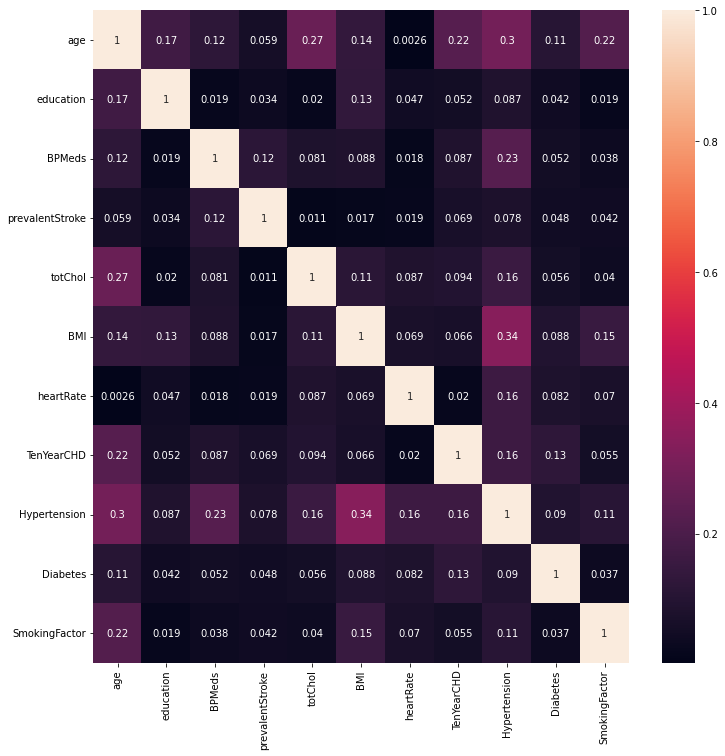

In [39]:
#Plotting the correlation matrix using heatmap
plt.figure(figsize=(12,12))
correlation=crp_df.corr()
sns.heatmap(abs(correlation),annot=True)

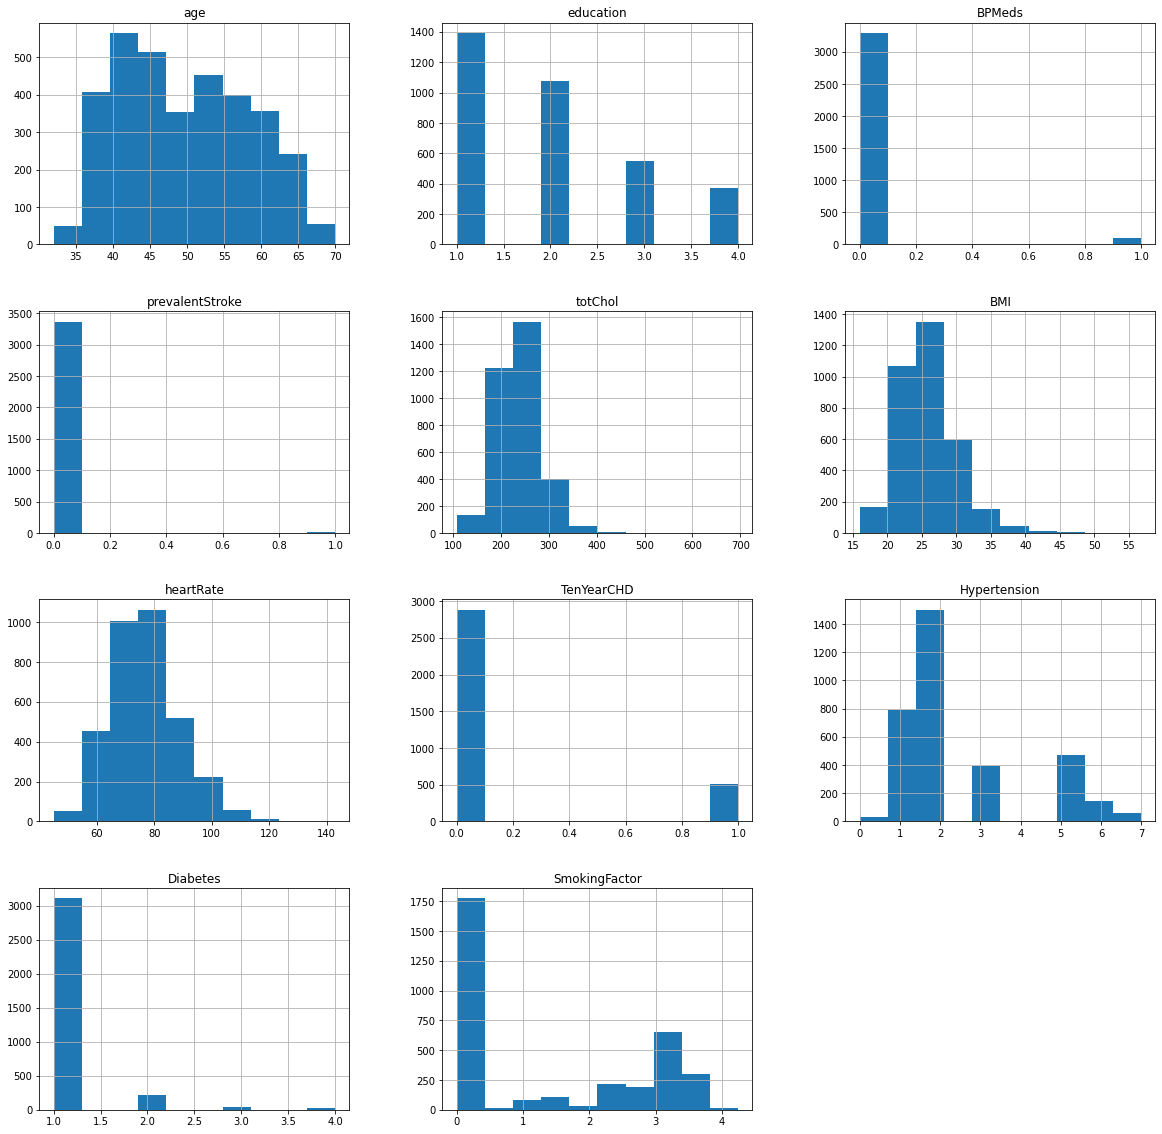

In [40]:
#Plot histogram to see the distribution of the data
fig=plt.figure(figsize=(20,20))
ax=fig.gca()
crp_df.hist(ax=ax)
plt.show()

BPMeds and prevalentStroke does not help in explaining variance so we can remove those columns.

In [41]:
#Remove not useful columns
crp_df.drop(columns=['BPMeds','prevalentStroke'],inplace=True)
crp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            3390 non-null   int64  
 1   education      3390 non-null   float64
 2   sex            3390 non-null   object 
 3   totChol        3390 non-null   float64
 4   BMI            3390 non-null   float64
 5   heartRate      3390 non-null   float64
 6   TenYearCHD     3390 non-null   int64  
 7   Hypertension   3390 non-null   int64  
 8   Diabetes       3390 non-null   int64  
 9   SmokingFactor  3390 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 420.4+ KB


Converting categorical data to numeric data for model training

In [42]:
crp_df['sex']=crp_df['sex'].apply(lambda x:1 if x=='M' else 0)

In [43]:
dependent_variable='TenYearCHD'
independent_variable=list(crp_df.columns)
independent_variable.remove(dependent_variable)
print(independent_variable)

['age', 'education', 'sex', 'totChol', 'BMI', 'heartRate', 'Hypertension', 'Diabetes', 'SmokingFactor']


In [44]:
X=crp_df[independent_variable].values
y=crp_df[dependent_variable].values
crp_df

,age,education,sex,totChol,BMI,heartRate,TenYearCHD,Hypertension,Diabetes,SmokingFactor
id,,,,,,,,,,
0,64,2.0,0,221.0,25.38,90.0,1,2,1,1.098612
1,36,4.0,1,212.0,29.77,72.0,0,5,1,0.000000
2,46,1.0,0,250.0,20.35,88.0,0,1,1,2.302585
3,50,1.0,1,233.0,28.26,68.0,1,3,1,2.995732
4,64,1.0,0,241.0,26.42,70.0,0,2,1,3.401197
...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0,261.0,29.28,70.0,0,2,2,0.000000
3386,46,1.0,0,199.0,21.96,80.0,0,0,1,0.000000
3387,44,3.0,1,352.0,28.92,73.0,1,6,1,1.098612


Let's resample the dataset to over come this imbalance. We will apply SMOTE to resample the data. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic point are added between the chosen point and its neighbors

In [45]:
from imblearn.pipeline import Pipeline, make_pipeline
#The number before SMOTE
num_before=dict(Counter(y))

#Perform SMOTE
#Define pipeline
under=RandomUnderSampler(sampling_strategy=0.8)
over=SMOTE(sampling_strategy=0.8)
step=[('o',over),('u',under)]
pipeline=Pipeline(steps=step)

#Transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)

#The number after SMOTE
num_after=dict(Counter(y_smote))

print(num_before,num_after)

{1: 511, 0: 2879} {0: 2878, 1: 2303}


In [46]:
#Split the data
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.2)

In [47]:
#Scaling the data
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train_scaled)

X_test_scaled=scaler.fit_transform(X_test)
X_test=pd.DataFrame(X_test_scaled)

<h6><b>KNN Classifier</b></h6>

In [48]:
from sklearn import neighbors
#Calculate accuracy score for first 10 beighbore
#Setup array to store training and test accuracies
neighbores=10
train_accuracy=np.empty(neighbores)
test_accuracy=np.empty(neighbores)

for i in range(1,neighbores+1):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  train_accuracy[i-1]=knn.score(X_train,y_train)
  test_accuracy[i-1]=knn.score(X_test,y_test)

In [49]:
#Print accuracy
print("Train Accuracy:",train_accuracy)
print("Test Accuracy:",test_accuracy)

Train Accuracy: [1.         0.96887066 0.91167954 0.90444015 0.87138031 0.86969112
 0.84749035 0.8351834  0.83156371 0.81660232]
Test Accuracy: [0.85342334 0.81967213 0.79942141 0.78592093 0.76663452 0.756027
 0.74349084 0.73384764 0.73095468 0.72516876]


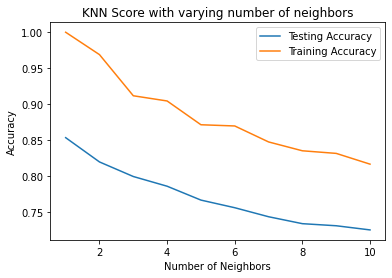

In [50]:
#Generate Plot
plt.title('KNN Score with varying number of neighbors')
x_axis=[i for i in range (1,11)]
plt.plot(x_axis,test_accuracy,label='Testing Accuracy')
plt.plot(x_axis,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

We can see that test score is increasing as number of neighbours increases.

Let's try to find best parameter for KNN

In [51]:
param_grid={'n_neighbors':np.arange(1,50)}

In [52]:
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [53]:
knn_cv.best_score_

0.8361433075179339

In [54]:
knn_cv.best_params_

{'n_neighbors': 1}

In [55]:
#Predictions
knn_predict=knn_cv.predict(X_test)

In [56]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       543
           1       0.80      0.91      0.86       494

    accuracy                           0.85      1037
   macro avg       0.86      0.86      0.85      1037
weighted avg       0.86      0.85      0.85      1037



<h4><b>Logistic Regression</b></h4>

In [57]:
#Create and train logistic regression model
logistic_regression_model=LogisticRegression(fit_intercept=True,max_iter=10000)
logistic_regression_model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [58]:
#Get the model coefficients
logistic_regression_model.coef_

array([[ 0.72755303, -0.06170446,  0.18990105,  0.10176201, -0.00853708,
        -0.06822433,  0.27665594,  0.21575053,  0.36422928]])

In [59]:
#Get the predicted probabilities
train_preds=logistic_regression_model.predict(X_train)
test_preds=logistic_regression_model.predict(X_test)

In [60]:
#Get the accuracy score
train_accuracy=accuracy_score(train_preds,y_train)
test_accuracy=accuracy_score(test_preds,y_test)

In [61]:
print("The accuracy on train data is",train_accuracy)
print("The accuracy on test data is",test_accuracy)

The accuracy on train data is 0.6788127413127413
The accuracy on test data is 0.639344262295082


In [62]:
#Get the confusion matrix for train
labels=['No Risk','At Risk']
cm=confusion_matrix(y_train,train_preds)
print(cm)

[[1762  573]
 [ 758 1051]]


In [63]:
print(classification_report(y_train,train_preds))
print('\n')
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73      2335
           1       0.65      0.58      0.61      1809

    accuracy                           0.68      4144
   macro avg       0.67      0.67      0.67      4144
weighted avg       0.68      0.68      0.68      4144



              precision    recall  f1-score   support

           0       0.64      0.72      0.68       543
           1       0.64      0.55      0.59       494

    accuracy                           0.64      1037
   macro avg       0.64      0.64      0.63      1037
weighted avg       0.64      0.64      0.64      1037



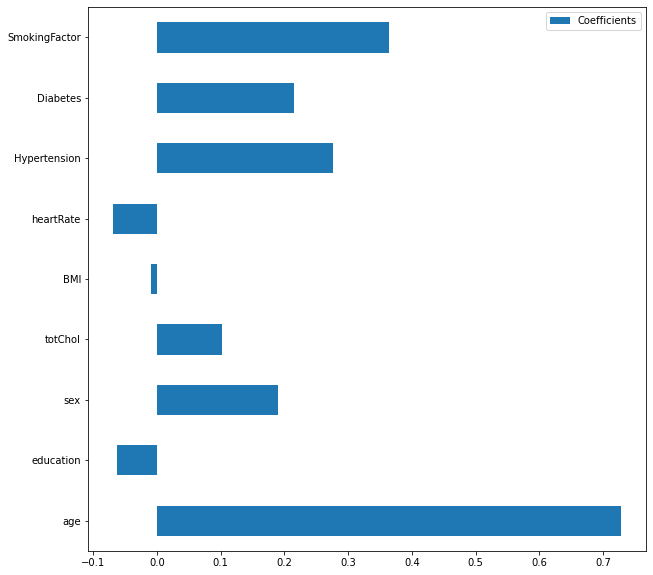

In [64]:
 fn=list(crp_df.columns)
 fn.remove('TenYearCHD')
coefs=pd.DataFrame(logistic_regression_model.coef_[0],columns=['Coefficients'],index=fn)
coefs.plot(kind='barh',figsize=(10,10))


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

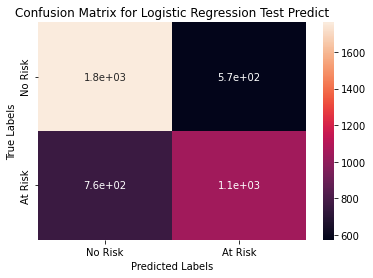

In [65]:
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
#labels,title and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Logistic Regression Test Predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[390 153]
 [221 273]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

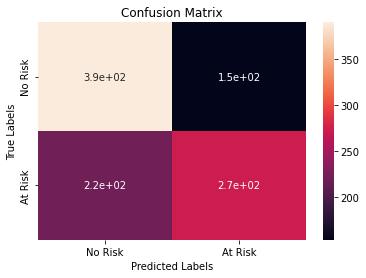

In [66]:
#Get the confusion matrix for test
labels=['No Risk','At Risk']
cm=confusion_matrix(y_test,test_preds)
print(cm)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
#label, title and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [67]:
#Print accuracy and roc_auc score
print('ROCAUC Score:',roc_auc_score(y_test,test_preds))
print('Accuracy score:',accuracy_score(y_test,test_preds))

ROCAUC Score: 0.6354318115731318
Accuracy score: 0.639344262295082


In [68]:
#Print the classification report for train and test
print(classification_report(y_train,train_preds))
print('\n')
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73      2335
           1       0.65      0.58      0.61      1809

    accuracy                           0.68      4144
   macro avg       0.67      0.67      0.67      4144
weighted avg       0.68      0.68      0.68      4144



              precision    recall  f1-score   support

           0       0.64      0.72      0.68       543
           1       0.64      0.55      0.59       494

    accuracy                           0.64      1037
   macro avg       0.64      0.64      0.63      1037
weighted avg       0.64      0.64      0.64      1037



<h6><b>Building Desicion Tree Model</b></h6>

Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. it works for both categorical and continuous input and output variable.

In [69]:
decision_tree_model=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=50,random_state=0)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=0)

Predicting on test cell and train cell

In [70]:
train_preds=decision_tree_model.predict(X_train)
test_preds=decision_tree_model.predict(X_test)

In [71]:
#Measuring accuracy and AUC-ROC score
testing_accuracy=accuracy_score(y_test,test_preds)*100
print(f'The testing accuracy is {testing_accuracy}')
training_accuracy=accuracy_score(y_train,train_preds)*100
print(f'The training accuracy is {training_accuracy}')

The testing accuracy is 61.716489874638384
The training accuracy is 83.25289575289575


[Text(0.401, 0.9545454545454546, 'X[0] <= -0.358\nentropy = 0.988\nsamples = 4144\nvalue = [2335, 1809]'),
 Text(0.128, 0.8636363636363636, 'X[8] <= -0.974\nentropy = 0.805\nsamples = 1682\nvalue = [1268, 414]'),
 Text(0.064, 0.7727272727272727, 'X[3] <= -1.695\nentropy = 0.404\nsamples = 608\nvalue = [559, 49]'),
 Text(0.032, 0.6818181818181818, 'X[3] <= -1.725\nentropy = 0.881\nsamples = 30\nvalue = [21, 9]'),
 Text(0.016, 0.5909090909090909, 'entropy = 0.426\nsamples = 23\nvalue = [21, 2]'),
 Text(0.048, 0.5909090909090909, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.096, 0.6818181818181818, 'X[0] <= -1.117\nentropy = 0.363\nsamples = 578\nvalue = [538, 40]'),
 Text(0.08, 0.5909090909090909, 'entropy = 0.12\nsamples = 247\nvalue = [243, 4]'),
 Text(0.112, 0.5909090909090909, 'entropy = 0.496\nsamples = 331\nvalue = [295, 36]'),
 Text(0.192, 0.7727272727272727, 'X[2] <= -0.988\nentropy = 0.925\nsamples = 1074\nvalue = [709, 365]'),
 Text(0.16, 0.6818181818181818, 'X[8] <= 

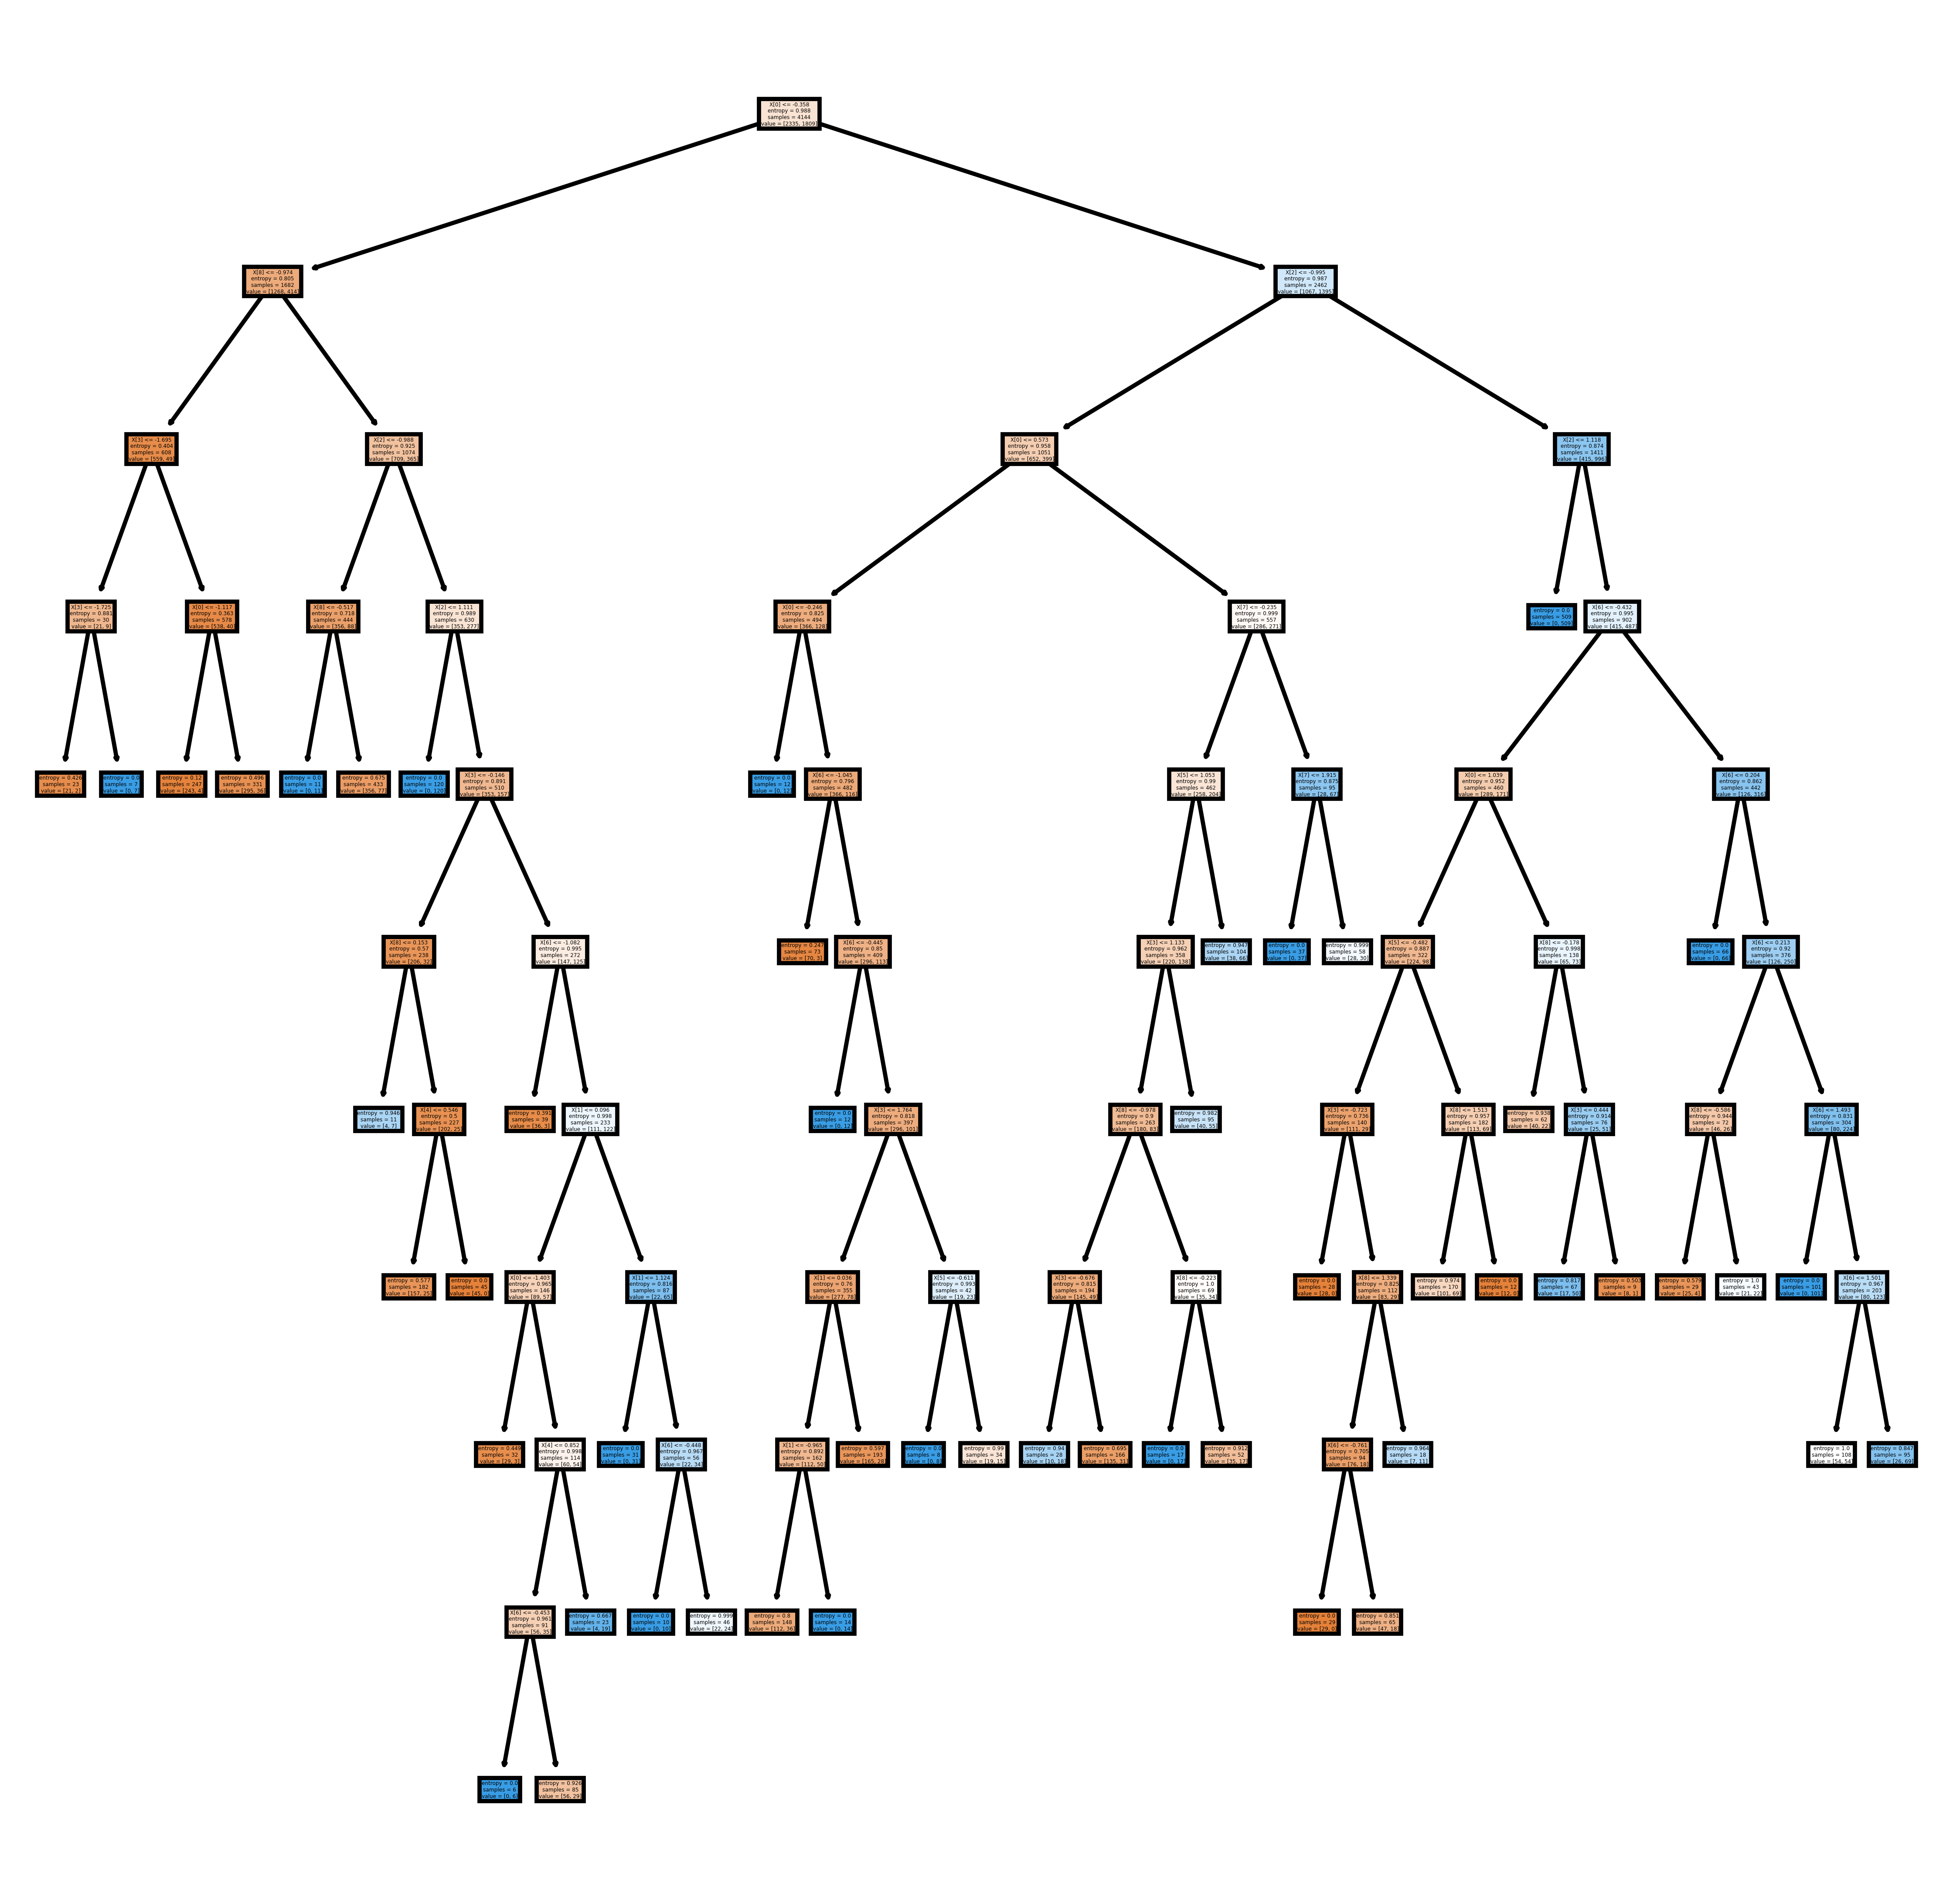

In [72]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,8),dpi=700)
tree.plot_tree(decision_tree_model,filled=True)

[[2118  217]
 [ 477 1332]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

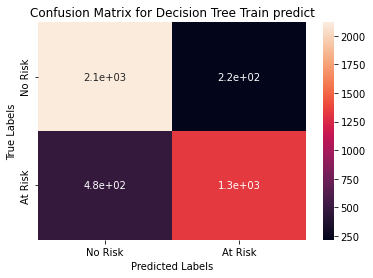

In [73]:
#The confusion matrix for training
labels=['No Risk','At Risk']
cm=confusion_matrix(y_train,train_preds)
print(cm)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[223 320]
 [ 77 417]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

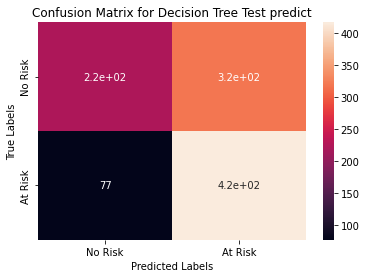

In [74]:
#The confusion matrix for test data
labels=['No Risk','At Risk']
cm=confusion_matrix(y_test,test_preds)
print(cm)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [75]:
#Classification reporrt for train
print(classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2335
           1       0.86      0.74      0.79      1809

    accuracy                           0.83      4144
   macro avg       0.84      0.82      0.83      4144
weighted avg       0.84      0.83      0.83      4144



In [76]:
#Classification report for test
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.74      0.41      0.53       543
           1       0.57      0.84      0.68       494

    accuracy                           0.62      1037
   macro avg       0.65      0.63      0.60      1037
weighted avg       0.66      0.62      0.60      1037



<h6><b>Building Ensembles of Decision Tree</b></h6>

In [77]:
classifier=RandomForestClassifier(n_estimators=100,max_depth=15,random_state=30,min_samples_split=3,criterion='entropy')

In [78]:
classifier.fit(X_train,y_train) 

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       random_state=30)

In [79]:
train_preds=classifier.predict(X_train)
test_preds=classifier.predict(X_test)

Finding the accuracy and ROC_AUC score

In [80]:
accuracy_score(y_train,train_preds)

0.9930019305019305

In [81]:
accuracy_score(y_test,test_preds)

0.5940212150433944

In [82]:
roc_auc_score(y_test,test_preds)

0.6107861557847019

In [83]:
roc_auc_score(y_train,train_preds)

0.9919845218352681

[[2335    0]
 [  29 1780]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

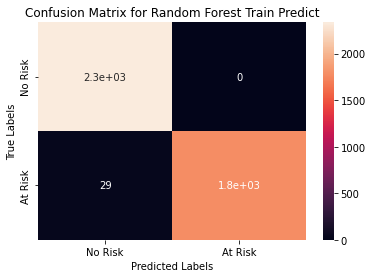

In [84]:
#The confusion matrix for training
labels=['No Risk', 'At Risk']
cm=confusion_matrix(y_train,train_preds)
print(cm)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Random Forest Train Predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[139 404]
 [ 17 477]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

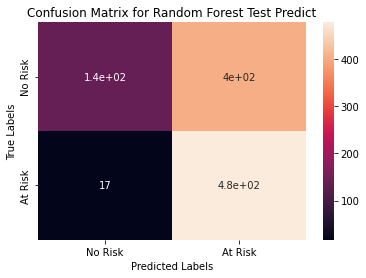

In [85]:
#The confusion Matrix for test data
labels=['No Risk', 'At Risk']
cm=confusion_matrix(y_test,test_preds)
print(cm)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Random Forest Test Predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [86]:
#Classification report for train
print(classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2335
           1       1.00      0.98      0.99      1809

    accuracy                           0.99      4144
   macro avg       0.99      0.99      0.99      4144
weighted avg       0.99      0.99      0.99      4144



In [87]:
#Classification Report for test
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.89      0.26      0.40       543
           1       0.54      0.97      0.69       494

    accuracy                           0.59      1037
   macro avg       0.72      0.61      0.55      1037
weighted avg       0.72      0.59      0.54      1037



In [88]:
import time
#f_n=[f"features{i}" for i in range(X.shape[1])]
f_n=list(crp_df.columns)
f_n.remove('TenYearCHD')

rf=RandomForestClassifier(random_state=1000)
rf.fit(X_train,y_train)

start_time=time.time()
impt=rf.feature_importances_
std=np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
e_t=time.time()-start_time


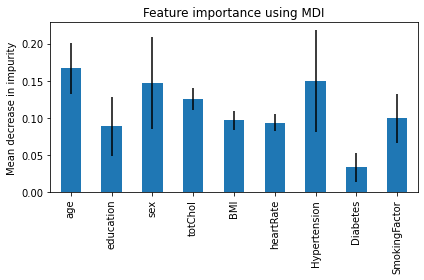

In [89]:
f_i=pd.Series(impt,index=f_n)

fig,ax=plt.subplots()
f_i.plot.bar(yerr=std,ax=ax)
ax.set_title('Feature importance using MDI')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [90]:
from sklearn.inspection import permutation_importance
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

f_n=list(crp_df.columns)
f_n.remove('TenYearCHD')
result=permutation_importance(rf,X_test,y_test,n_repeats=10,random_state=42,n_jobs=2)
f_i=pd.Series(result.importances_mean,index=f_n)

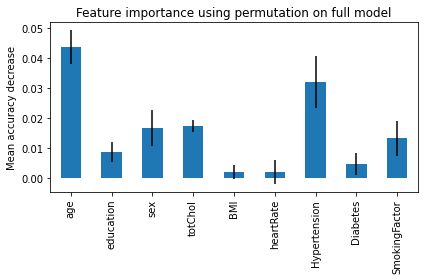

In [91]:
fig,ax=plt.subplots()
f_i.plot.bar(yerr=result.importances_std,ax=ax)
ax.set_title('Feature importance using permutation on full model')
ax.set_ylabel('Mean accuracy decrease')
fig.tight_layout()
plt.show()

In [92]:
#Gradient Booster Classifier
gradientBC=GradientBoostingClassifier(learning_rate=0.001,n_estimators=30,max_depth=20,random_state=30,min_samples_split=3)

In [93]:
gradientBC=GradientBoostingClassifier()
grid_values={'n_estimators':[50,80,100],'max_depth':[3,5,7,10],'learning_rate':[0.0001,0.001,0.01,0.05,0.000001,0.0003]}
classifier=GridSearchCV(classifier,param_grid=grid_values,scoring='roc_auc',cv=5)

In [94]:
gradientBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [95]:
train_preds=gradientBC.predict(X_train)
test_preds=gradientBC.predict(X_test)

The accuracy and ROC_AUC Score

In [96]:
accuracy_score(y_train,train_preds)

0.9054054054054054

In [97]:
accuracy_score(y_test,test_preds)

0.4918032786885246

In [98]:
roc_auc_score(y_test,test_preds)

0.5142762878296463

In [99]:
roc_auc_score(y_train,train_preds)

0.8935830010073355

[[2304   31]
 [ 361 1448]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

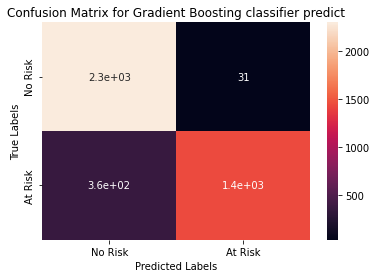

In [100]:
#The confusion matrix for training
labels=['No Risk','At Risk']
cm=confusion_matrix(y_train,train_preds)
print(cm)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Gradient Boosting classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[ 21 522]
 [  5 489]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

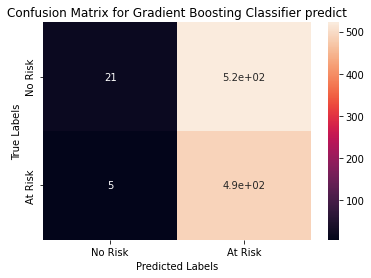

In [101]:
#The confusion matrix for testing
labels=['No Risk','At Risk']
cm=confusion_matrix(y_test,test_preds)
print(cm)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Text(0.5, 1.0, 'Roc Auc Curve for Gradient Boosting Classifire')

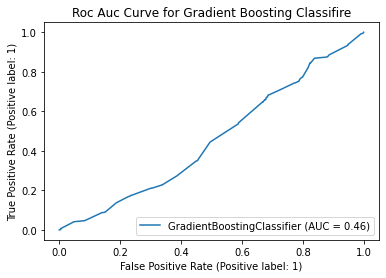

In [102]:
plot_roc_curve(gradientBC,X,y)
plt.title('Roc Auc Curve for Gradient Boosting Classifire')

Classification report of Train and Test

In [103]:
print(classification_report(y_test,test_preds))
print('\n')
print(classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.81      0.04      0.07       543
           1       0.48      0.99      0.65       494

    accuracy                           0.49      1037
   macro avg       0.65      0.51      0.36      1037
weighted avg       0.65      0.49      0.35      1037



              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2335
           1       0.98      0.80      0.88      1809

    accuracy                           0.91      4144
   macro avg       0.92      0.89      0.90      4144
weighted avg       0.91      0.91      0.90      4144



Text(0, 0.5, 'Values')

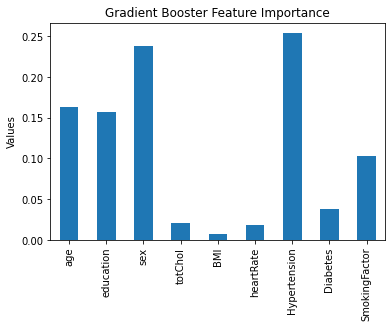

In [126]:

f_n=list(crp_df.columns)
f_n.remove('TenYearCHD')
impt=gradientBC.feature_importances_
f_i=pd.Series(impt,index=f_n)

ax=f_i.plot.bar(x=f_n,y=impt)
ax.set_title('Gradient Booster Feature Importance')
ax.set_ylabel('Values')

In [104]:
#Using XGBoost
xg_cla=xgb.XGBClassifier(objective='binary:logistic',colsample_bytree=0.7,learning_rate=0.01,max_depth=10,alpha=10,n_estimators=10,subsample=1)

In [105]:
xg_cla.fit(X_test,y_test)

XGBClassifier(alpha=10, colsample_bytree=0.7, learning_rate=0.01, max_depth=10,
              n_estimators=10)

In [106]:
train_preds=xg_cla.predict(X_train)
test_preds=xg_cla.predict(X_test)

In [107]:
accuracy_score(y_train,train_preds)

0.48841698841698844

In [108]:
accuracy_score(y_test,test_preds)

0.9488910318225651

In [109]:
roc_auc_score(y_test,test_preds)

0.9473609650986796

In [110]:
roc_auc_score(y_train,train_preds)

0.544295178876022

[[ 243 2092]
 [  28 1781]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

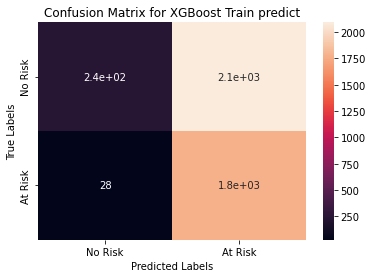

In [111]:
#The Confusion matrix for training
labels=['No Risk','At Risk']
cm=confusion_matrix(y_train,train_preds)
print(cm)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for XGBoost Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[532  11]
 [ 42 452]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

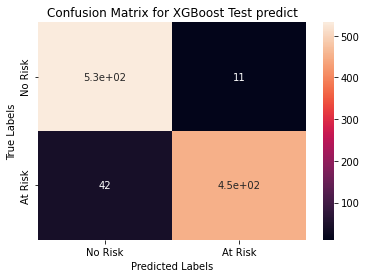

In [112]:
#The Confusion Matrix for Testing
labels=['No Risk','At Risk']
cm=confusion_matrix(y_test,test_preds)
print(cm)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for XGBoost Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [113]:
#Classification Report for Train and Test
print(classification_report(y_test,test_preds))
print('\n')
print(classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       543
           1       0.98      0.91      0.94       494

    accuracy                           0.95      1037
   macro avg       0.95      0.95      0.95      1037
weighted avg       0.95      0.95      0.95      1037



              precision    recall  f1-score   support

           0       0.90      0.10      0.19      2335
           1       0.46      0.98      0.63      1809

    accuracy                           0.49      4144
   macro avg       0.68      0.54      0.41      4144
weighted avg       0.71      0.49      0.38      4144



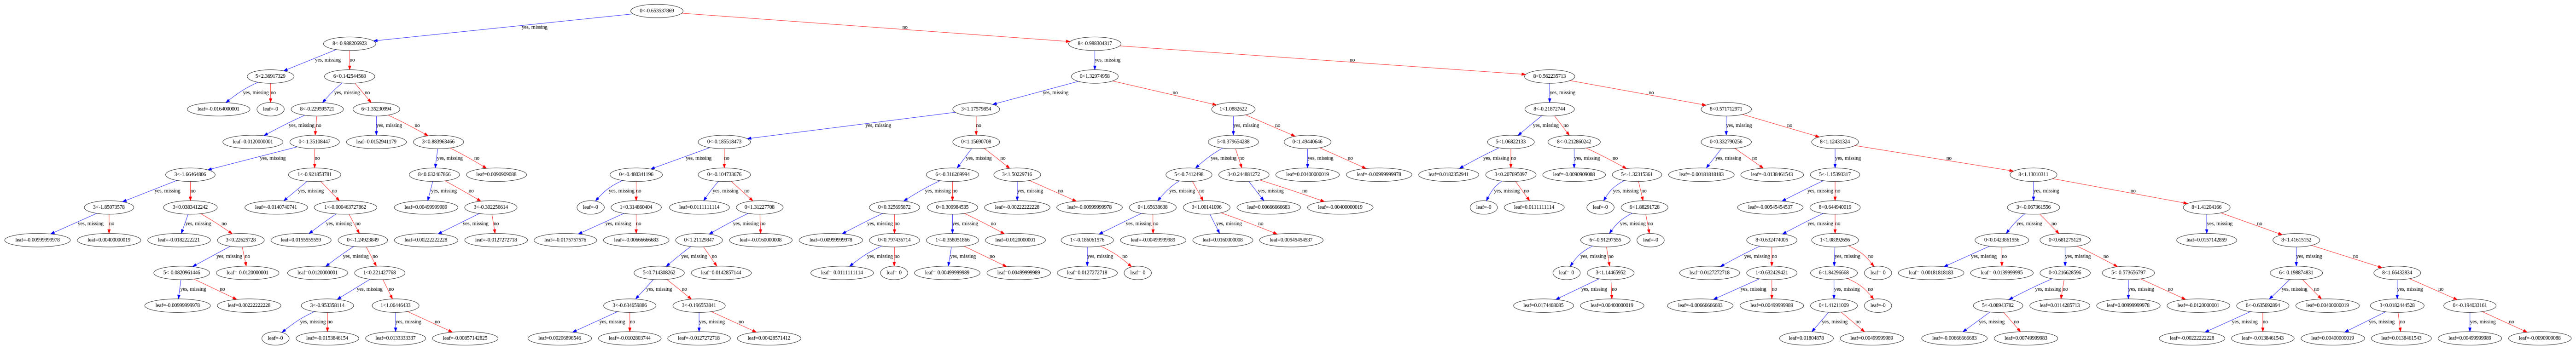

In [114]:
#Visualising the Tree
ax=xgb.plot_tree(xg_cla,num_trees=0)
ax.figure.set_size_inches(100,100)
plt.show()

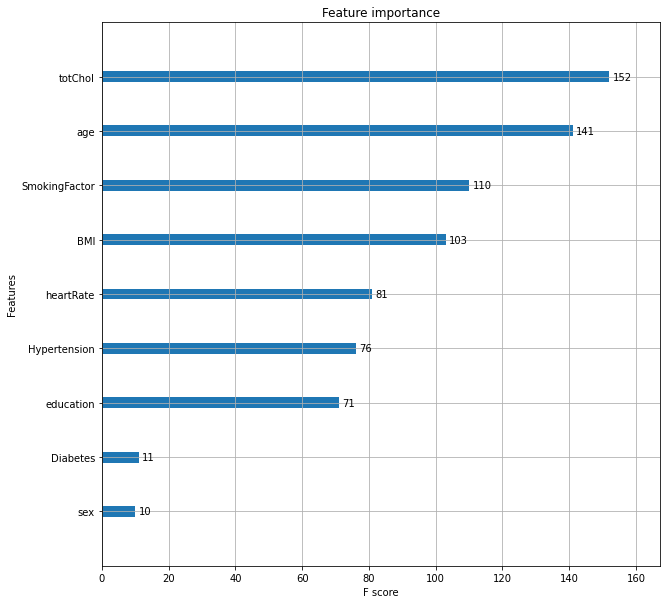

In [115]:
org_feature_names=list(crp_df.columns)
org_feature_names.remove('TenYearCHD')
xg_cla.get_booster().feature_names=org_feature_names
ax=xgb.plot_importance(xg_cla)
ax.figure.set_size_inches(10,10)
plt.show()

<h4><b>Conclusion:</b></h4>

<ul>
<li>If we want to completely avoid any situation where the patient has heart disease, a high recall is desired where as if we want to avoid treating a patient with no heart diseases a high precision is desired.</li>
<li>AAssuming that in our case the patients, who were incorrectly classified as suffering from heart disease are equally important since they could be indicative of some other aliment so, we want a balance between precision and recall and a high F1 score is desired.</li>
<li>Since we have added synthetic data points to habdel the huge class imbalnce in training set the data distribution in train and test are different so the high performance of models in the traain set is due to the train test data distribution mismatch and not due to overfitting.</li>
<li>Best performance of models on test data based on ebaluation metrics of class:</li>
<li>Recall: Gradient Booster</li>
<li>Precision: KNN, Ensembles Decision Tree</li>
<li>F1 Score: XGBooster</li>
<li>Accuracy: XGBooster</li>
</ul>